In [1]:
import EOSutils as meos

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.style.use('classic')

from astropy.table import Table
from astropy import units as u
from astropy.constants import G

import mesa_helper as mh
import os
import shutil
import copy

from scipy import interpolate
from scipy.linalg import lstsq as scipy_lstsq
from scipy.ndimage import gaussian_filter
import scipy.integrate as integrate
import decimal 

%matplotlib inline

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_77854/3170626572.py:15: RuntimeWarning: overflow encountered in power
  meos.plot_PSE(toy, 10**toy.log10Pgrid,10**toy.log10Sgrid,10**toy.log10Ugrid)
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:705: UserWarning: The following kwargs were not used by contour: 'shading'
  cs00 = axes[0].contourf(plot_rho, plot_T, np.log10(plot_P), shading='nearest', cmap='magma', levels=np.linspace(0,30,20))
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:710: UserWarning: The following kwargs were not used by contour: 'shading'
  cs01 = axes[1].contourf(plot_rho, plot_T, np.log10(plot_S), shading='nearest', cmap='magma',levels=np.linspace(6,10,20))
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:715: UserWarning: The following kwargs were not used by contour: 'shading'
  cs02 = axes[2].contourf(plot_rho, plot_T, np.log10(plot_E), shading='nea

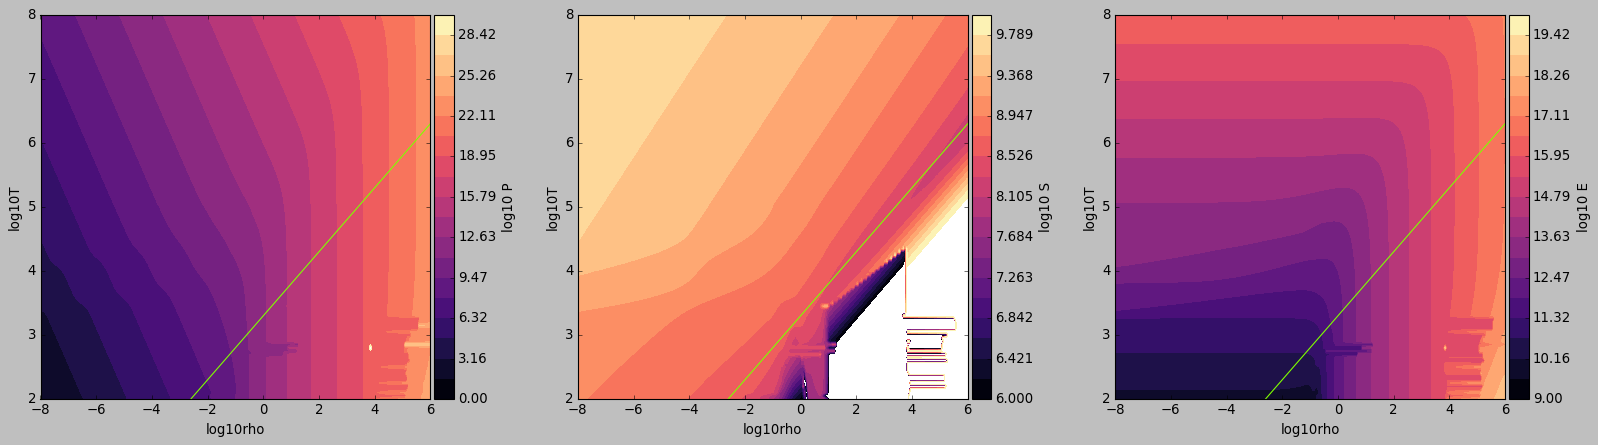

In [2]:
toy = meos.CMStable("../2021_chabrier+_tables/TABLE_H_Trho_v1",units='cgs')
toy.log10Ugrid[~np.isfinite(toy.log10Ugrid)] = np.max(toy.log10Ugrid[np.isfinite(toy.log10Ugrid)])
toy.log10Sgrid[~np.isfinite(toy.log10Sgrid)] = np.max(toy.log10Sgrid[np.isfinite(toy.log10Sgrid)])

'''
boundary = 3.4 + 0.5*toy.log10rhogrid + np.log10(toy.atomic_number) - (5./3)*np.log10(toy.mass_number)
mask = (toy.log10Tgrid < boundary)
allowedMask = ~mask
    
toy.log10Pgrid = np.ma.array(toy.log10Pgrid, mask=~allowedMask, fill_value = np.nan)
toy.log10Sgrid = np.ma.array(toy.log10Sgrid, mask=~allowedMask, fill_value = np.nan)
toy.log10Ugrid = np.ma.array(toy.log10Ugrid, mask=~allowedMask, fill_value = np.nan)
'''

meos.plot_PSE(toy, 10**toy.log10Pgrid,10**toy.log10Sgrid,10**toy.log10Ugrid)

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_77854/2179440833.py:1: RuntimeWarning: overflow encountered in power
  dP_drho, dS_drho, dE_drho, dP_dT, dS_dT, dE_dT =  meos.finite_difference(toy, 10**toy.log10Pgrid,10**toy.log10Sgrid,10**toy.log10Ugrid,
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:937: RuntimeWarning: invalid value encountered in log10
  zs=[np.log10(dP_drho_T),np.log10(-1*dS_drho_T),np.log10(np.abs(dE_drho_T)),np.log10(dP_dT_rho),np.log10(dS_dT_rho),np.log10(dE_dT_rho)],
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:937: RuntimeWarning: divide by zero encountered in log10
  zs=[np.log10(dP_drho_T),np.log10(-1*dS_drho_T),np.log10(np.abs(dE_drho_T)),np.log10(dP_dT_rho),np.log10(dS_dT_rho),np.log10(dE_dT_rho)],
/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:802: UserWarning: The following kwargs were not used by contour: 'shading'
  cs = axes[i,j].conto

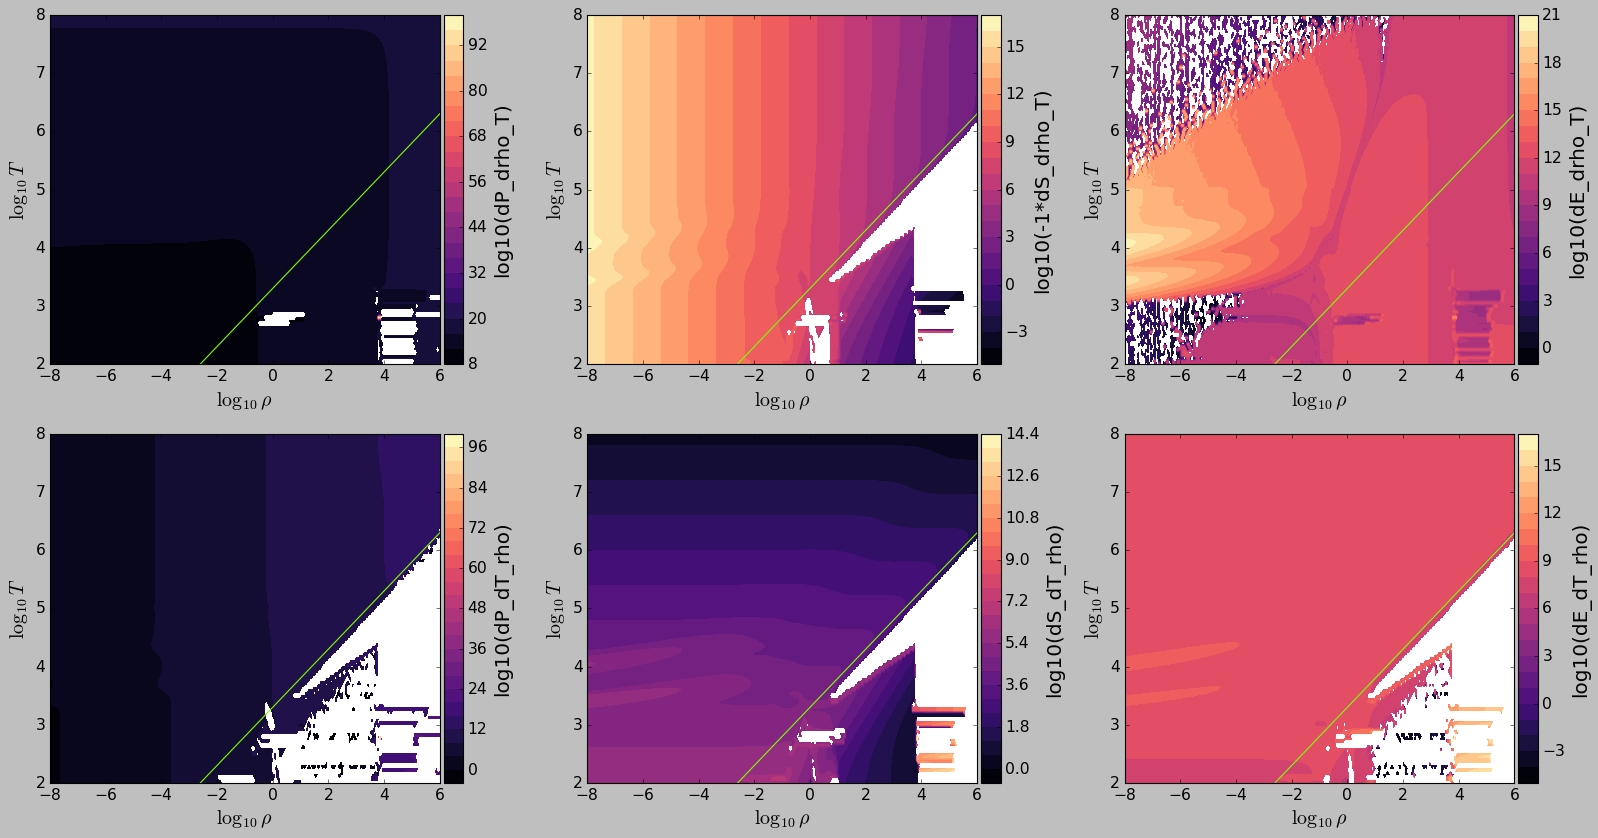

In [3]:
dP_drho, dS_drho, dE_drho, dP_dT, dS_dT, dE_dT =  meos.finite_difference(toy, 10**toy.log10Pgrid,10**toy.log10Sgrid,10**toy.log10Ugrid,
                                                                         species='H', maskUnphysicalRegion=False, plot=True, savename=None)



In [4]:
print(np.shape(toy.log10Pgrid))
print(len(toy.independent_arr_1))

(281, 121)
121


In [5]:
derivs_1 = np.gradient(10**toy.log10Pgrid, 10**toy.independent_arr_2,10**toy.independent_arr_1,edge_order=1)
derivs_2 = np.gradient(10**toy.log10Pgrid, 10**toy.independent_arr_2,10**toy.independent_arr_1,edge_order=2)


#  difference between edge order 1 and 2 is negligible

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_77854/2765026291.py:7: RuntimeWarning: invalid value encountered in log10
  zs=[np.log10(derivs_1[0]),np.log10(derivs_2[0]),np.log10(derivs_1[0])-np.log10(derivs_2[0]),np.log10(derivs_1[1]),np.log10(derivs_2[1]),np.log10(derivs_1[1])-np.log10(derivs_2[1])],
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_77854/2765026291.py:7: RuntimeWarning: divide by zero encountered in log10
  zs=[np.log10(derivs_1[0]),np.log10(derivs_2[0]),np.log10(derivs_1[0])-np.log10(derivs_2[0]),np.log10(derivs_1[1]),np.log10(derivs_2[1]),np.log10(derivs_1[1])-np.log10(derivs_2[1])],
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_77854/2765026291.py:7: RuntimeWarning: invalid value encountered in subtract
  zs=[np.log10(derivs_1[0]),np.log10(derivs_2[0]),np.log10(derivs_1[0])-np.log10(derivs_2[0]),np.log10(derivs_1[1]),np.log10(derivs_2[1]),np.log10(derivs_1[1])-np.log10(derivs_2[1])],
/Users/emily/Documents/astro/giant_planets/ME

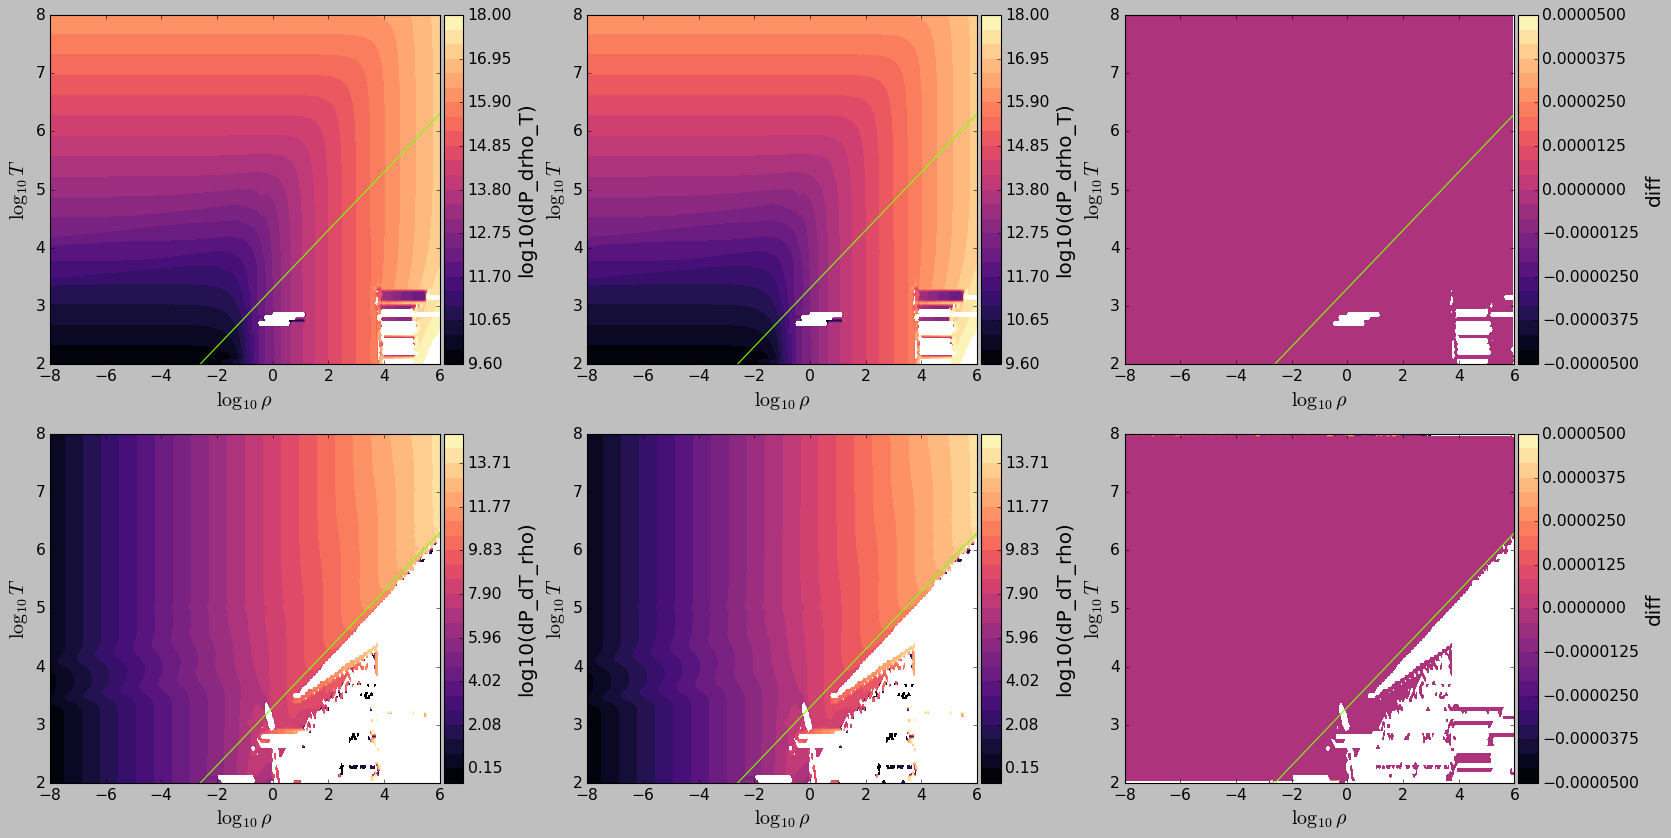

In [6]:
plot_line_x = np.linspace(-8,8,100)
plot_line_y = 3.3 + (1./2.)*plot_line_x + np.log10(toy.atomic_number) - (5./3)*np.log10(toy.mass_number)

meos.contourf_sublots_with_colorbars(nRow=2, nCol=3, 
                                xs=[toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid],
                                ys=[toy.log10Tgrid, toy.log10Tgrid,toy.log10Tgrid, toy.log10Tgrid,toy.log10Tgrid, toy.log10Tgrid],
                                zs=[np.log10(derivs_1[0]),np.log10(derivs_2[0]),np.log10(derivs_1[0])-np.log10(derivs_2[0]),np.log10(derivs_1[1]),np.log10(derivs_2[1]),np.log10(derivs_1[1])-np.log10(derivs_2[1])],
                                xlims=[(-8,6),(-8,6),(-8,6),(-8,6),(-8,6),(-8,6)], 
                                ylims=[(2,8),(2,8),(2,8),(2,8),(2,8),(2,8)], 
                                zlims=[(9.6,18),(9.6,18),(-0.00005,0.00005),(-0.5,15),(-0.5,15),(-0.00005,0.00005)], 
                                levels=[25,25,25,25,25,25],
                                xlabels=[r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$'],
                                zlabels=['log10(dP_drho_T)','log10(dP_drho_T)','diff','log10(dP_dT_rho)','log10(dP_dT_rho)','diff'],
                                cmap='magma',
                                vlines=None, 
                                hlines=None, 
                                otherlines_x=[plot_line_x], otherlines_y=[plot_line_y], savename=None)


# difference between my code and np gradient?

In [7]:
P_derivs = np.gradient(10**toy.log10Pgrid, 10**toy.independent_arr_2,10**toy.independent_arr_1,edge_order=1)
S_derivs = np.gradient(10**toy.log10Sgrid, 10**toy.independent_arr_2,10**toy.independent_arr_1,edge_order=1)
E_derivs = np.gradient(10**toy.log10Ugrid, 10**toy.independent_arr_2,10**toy.independent_arr_1,edge_order=1)


/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_77854/886013363.py:2: RuntimeWarning: overflow encountered in power
  S_derivs = np.gradient(10**toy.log10Sgrid, 10**toy.independent_arr_2,10**toy.independent_arr_1,edge_order=1)
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_77854/886013363.py:3: RuntimeWarning: overflow encountered in power
  E_derivs = np.gradient(10**toy.log10Ugrid, 10**toy.independent_arr_2,10**toy.independent_arr_1,edge_order=1)


/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_77854/1269052444.py:7: RuntimeWarning: invalid value encountered in log10
  zs=[np.log10(P_derivs[0])-np.log10(dP_drho),
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_77854/1269052444.py:8: RuntimeWarning: invalid value encountered in log10
  np.log10(-S_derivs[0])-np.log10(-dS_drho),
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_77854/1269052444.py:9: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(E_derivs[0]))-np.log10(np.abs(dE_drho)),
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_77854/1269052444.py:9: RuntimeWarning: invalid value encountered in subtract
  np.log10(np.abs(E_derivs[0]))-np.log10(np.abs(dE_drho)),
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_77854/1269052444.py:10: RuntimeWarning: divide by zero encountered in log10
  np.log10(P_derivs[1])-np.log10(dP_dT),
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_77854/1269052444.py

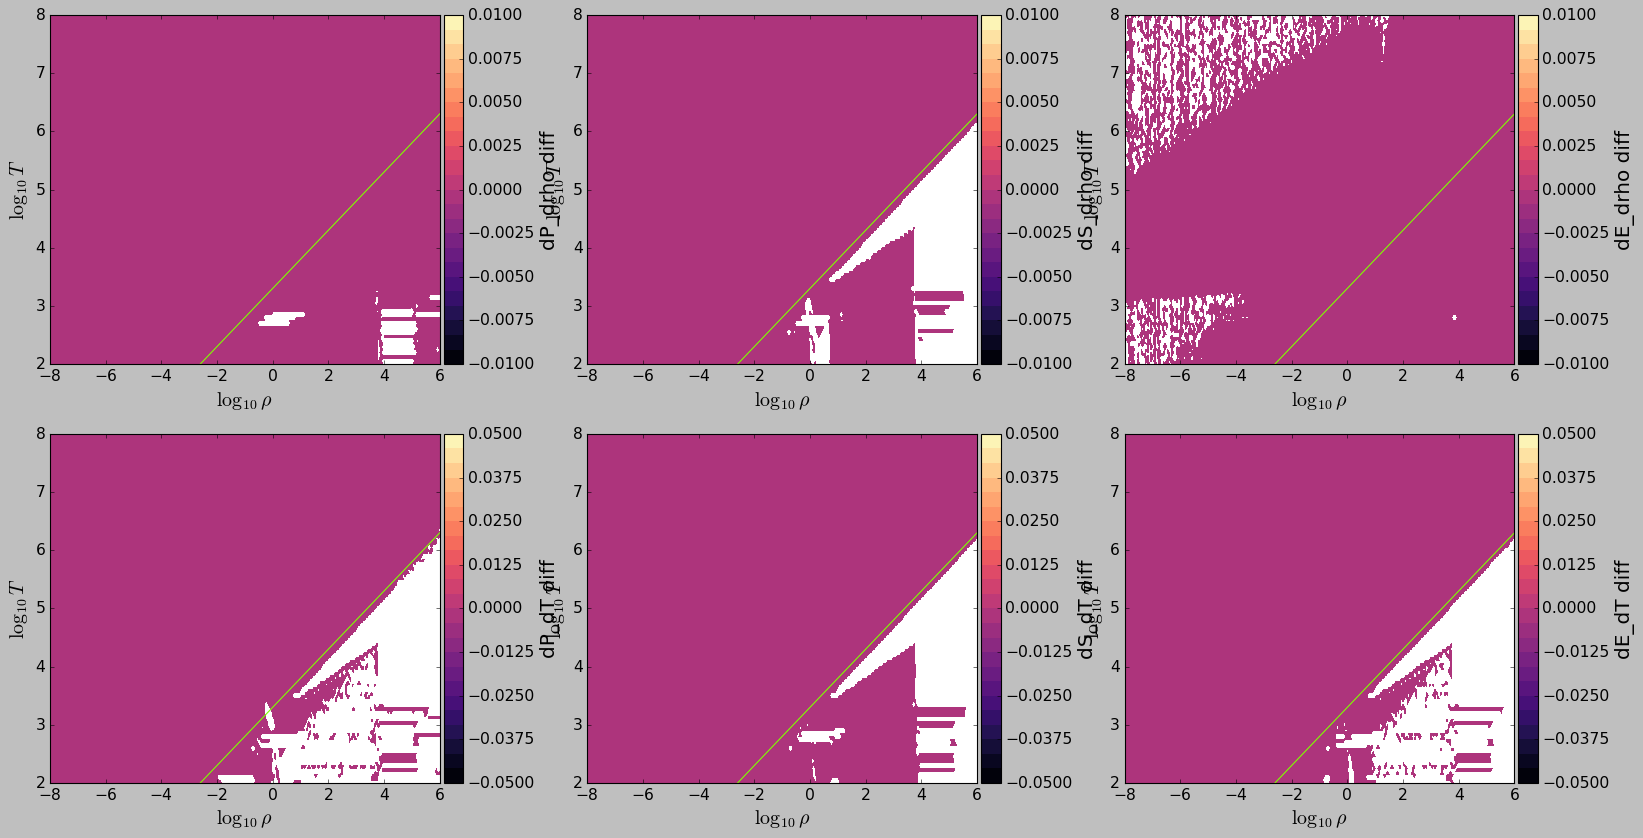

In [8]:
plot_line_x = np.linspace(-8,8,100)
plot_line_y = 3.3 + (1./2.)*plot_line_x + np.log10(toy.atomic_number) - (5./3)*np.log10(toy.mass_number)

meos.contourf_sublots_with_colorbars(nRow=2, nCol=3, 
                                xs=[toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid,toy.log10rhogrid],
                                ys=[toy.log10Tgrid, toy.log10Tgrid,toy.log10Tgrid, toy.log10Tgrid,toy.log10Tgrid, toy.log10Tgrid],
                                zs=[np.log10(P_derivs[0])-np.log10(dP_drho),
                                    np.log10(-S_derivs[0])-np.log10(-dS_drho),
                                    np.log10(np.abs(E_derivs[0]))-np.log10(np.abs(dE_drho)),
                                    np.log10(P_derivs[1])-np.log10(dP_dT),
                                    np.log10(S_derivs[1])-np.log10(dS_dT),
                                    np.log10(E_derivs[1])-np.log10(dE_dT)],
                                xlims=[(-8,6),(-8,6),(-8,6),(-8,6),(-8,6),(-8,6)], 
                                ylims=[(2,8),(2,8),(2,8),(2,8),(2,8),(2,8)], 
                                zlims=[(-0.01,0.01),(-0.01,0.01),(-0.01,0.01),(-0.05,0.05),(-0.05,0.05),(-0.05,0.05)], 
                                levels=[25,25,25,25,25,25],
                                xlabels=[r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$',r'$\log_{10}\rho$'],
                                ylabels=[r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$',r'$\log_{10}T$'],
                                zlabels=['dP_drho diff','dS_drho diff','dE_drho diff','dP_dT diff','dS_dT diff','dE_dT diff'],
                                cmap='magma',
                                vlines=None, 
                                hlines=None, 
                                otherlines_x=[plot_line_x], otherlines_y=[plot_line_y], savename=None)
